<a href="https://colab.research.google.com/github/Ajjme/Climate_system_modeling/blob/main/SEALEVELRISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

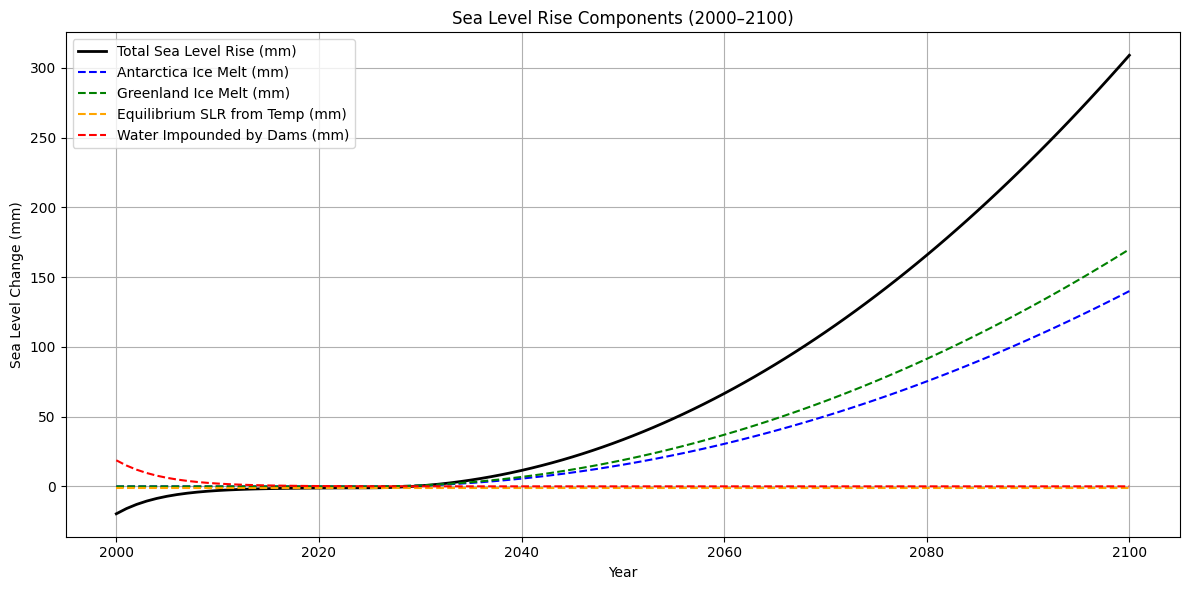

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === Time Settings === #
year_start = 2000
year_end = 2100
dt = 1
years = np.arange(year_start, year_end + 1)

# === Constants === #
mm_per_m = 1000
sensitivity_to_temp = 3.05
temp_adjustment_for_slr = 0.2418
mean_temp_change_1750_1850 = 0.05
initial_impoundment_by_dams = 23.4
avg_dam_water_loss_time = 5

# Physical constants
heat_capacity = 4186
area = 5.1e14
density = 1000
seconds_per_year = 3.15569e7
mixed_depth = 100
land_thickness = 8.4
land_fraction = 0.292
volumetric_heat_capacity = heat_capacity * seconds_per_year * density
upper_layer_volume = area * (land_fraction * land_thickness + (1 - land_fraction) * mixed_depth)
atm_ocean_heat_cap = upper_layer_volume * volumetric_heat_capacity / area

# Ice melt contributions
AR6_SLR_Antarctica = 0.11
Projected_SLR_Antarctica_2100 = 0.25
AR6_SLR_Greenland = 0.13
Projected_SLR_Greenland_2100 = 0.30
add_slr_antarctica = (Projected_SLR_Antarctica_2100 - AR6_SLR_Antarctica) * mm_per_m
add_slr_greenland = (Projected_SLR_Greenland_2100 - AR6_SLR_Greenland) * mm_per_m

# Exponential ice melt curve
def exponential_ice_melt_contribution(year, base_year, total_contribution, end_year):
    scale = (year - base_year) / (end_year - base_year)
    return total_contribution * (scale ** 2) if year >= base_year else 0

# === Initial Conditions === #
dam_water = initial_impoundment_by_dams
heat = 0

# === Tracking === #
slr_antarctica_list = []
slr_greenland_list = []
equilibrium_slr_list = []
dam_water_list = []
total_slr_list = []

# === Simulation Loop === #
for year in years:
    # Water Impounded by Dams (INTEG structure)
    impoundment = 0.01
    loss_from_dams = dam_water / avg_dam_water_loss_time
    dam_water += (impoundment - loss_from_dams) * dt

    # Antarctica Ice Melt
    slr_antarctica = exponential_ice_melt_contribution(year, 2025, add_slr_antarctica, 2100)

    # Greenland Ice Melt
    slr_greenland = exponential_ice_melt_contribution(year, 2025, add_slr_greenland, 2100)

    # Temperature and Equilibrium Sea Level Rise
    heat += 3.0
    temp_change_1750 = heat / atm_ocean_heat_cap
    temp_change_1850 = temp_change_1750 - mean_temp_change_1750_1850
    adjusted_temp = temp_change_1850 - temp_adjustment_for_slr
    equilibrium_slr = sensitivity_to_temp * adjusted_temp

    # Total Sea Level Rise
    total_slr = equilibrium_slr + slr_antarctica + slr_greenland - dam_water

    # Store Results
    slr_antarctica_list.append(slr_antarctica)
    slr_greenland_list.append(slr_greenland)
    equilibrium_slr_list.append(equilibrium_slr)
    dam_water_list.append(dam_water)
    total_slr_list.append(total_slr)

# === Plotting === #
plt.figure(figsize=(12, 6))
plt.plot(years, total_slr_list, label='Total Sea Level Rise (mm)', color='black', linewidth=2)
plt.plot(years, slr_antarctica_list, label='Antarctica Ice Melt (mm)', linestyle='--', color='blue')
plt.plot(years, slr_greenland_list, label='Greenland Ice Melt (mm)', linestyle='--', color='green')
plt.plot(years, equilibrium_slr_list, label='Equilibrium SLR from Temp (mm)', linestyle='--', color='orange')
plt.plot(years, dam_water_list, label='Water Impounded by Dams (mm)', linestyle='--', color='red')

plt.title('Sea Level Rise Components (2000–2100)')
plt.xlabel('Year')
plt.ylabel('Sea Level Change (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
